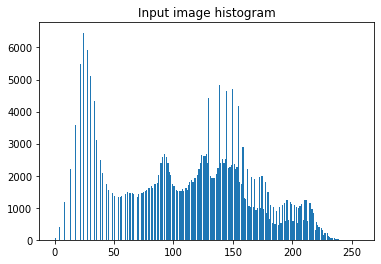

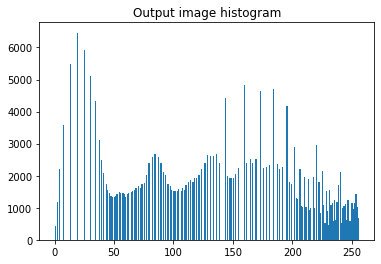

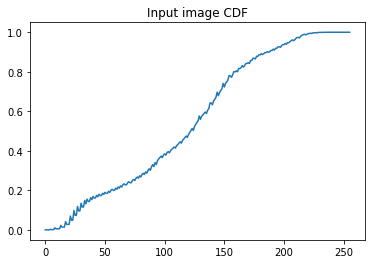

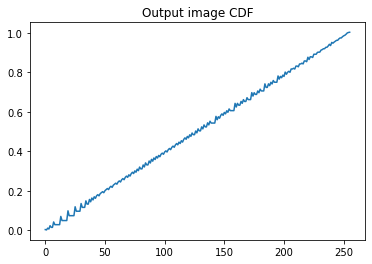

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as dpc

inputimg = cv2.imread('images/lenna.png', cv2.IMREAD_GRAYSCALE)
ipx_min = np.min(inputimg)
ipx_max = np.max(inputimg)

# incresing the constrast
for i in range (inputimg.shape[0]):
    for j in range(inputimg.shape[1]):
        inputimg[i][j] = (((inputimg[i][j] - ipx_min)/(ipx_max - ipx_min)) * 255)

inputimg = inputimg.astype(np.uint8)
outputimg = dpc(inputimg)

# initialize all vars
inpixel_frequency = [0 for i in range (256)]
outpixel_frequency = [0 for i in range (256)]
inpixel_pdf = [0.0 for i in range (256)]
outpixel_pdf = [0.0 for i in range (256)]
inpixel_cdf = [0.0 for i in range(256)]
outpixel_cdf = [0.0 for i in range(256)]
new_intesity = [0.0 for i in range (256)]    

# frequency count of input pixels
for i in range(outputimg.shape[0]):
    for j in range(outputimg.shape[1]):
        x = outputimg[i][j]
        inpixel_frequency[x] += 1
        
# calculate PDF of input pixels (probability density)
image_size = outputimg.shape[0]*outputimg.shape[1]
for i in range(256):
    inpixel_pdf[i] = inpixel_frequency[i] / image_size

# calculate CDF of input pixels (cumulative density)
sum_inpixel_cdf = 0
for i in range(256):
    sum_inpixel_cdf += inpixel_pdf[i]
    inpixel_cdf[i] = sum_inpixel_cdf + inpixel_pdf[i]
    new_intesity[i] = round(sum_inpixel_cdf * 255)

# modify output pixels
for i in range(outputimg.shape[0]):
    for j in range(outputimg.shape[1]):
        x = outputimg[i][j]
        outputimg[i][j] = new_intesity[x]

# frequency count of the output pixels
for i in range(outputimg.shape[0]):
    for j in range(outputimg.shape[1]):
        x = outputimg[i][j]
        outpixel_frequency[x] += 1

# calculate PDF of output pixels
for i in range(256):
    outpixel_pdf[i] = outpixel_frequency[i] / image_size

# calculate CDF of output pixels
sum_outpixel_cdf = 0
for i in range(256):
    sum_outpixel_cdf += outpixel_pdf[i]
    outpixel_cdf[i] = sum_outpixel_cdf + outpixel_pdf[i]
    
plt.title('Input image histogram')
plt.hist(inputimg.ravel(), 256, [0,256])
plt.show()

plt.title('Output image histogram')
plt.hist(outputimg.ravel(), 256, [0,256])
plt.show()

plt.title('Input image CDF')
plt.plot(inpixel_cdf)
plt.show()

plt.title('Output image CDF')
plt.plot(outpixel_cdf)
plt.show()
            
cv2.imshow('Input Image', inputimg)
cv2.imshow('Output image [Histogram Equalization]', outputimg)
cv2.waitKey(0)
cv2.destroyAllWindows()